In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables

data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [4]:
# Normalise the target data (this will make clearer training curves)

targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [6]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    
    return model

model = get_model()

In [7]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [9]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 1.0185 - mae: 0.8756 - val_loss: 0.8292 - val_mae: 0.7376
Epoch 2/100
337/337 - 0s - loss: 0.9294 - mae: 0.8418 - val_loss: 0.6614 - val_mae: 0.6567
Epoch 3/100
337/337 - 0s - loss: 0.7506 - mae: 0.7549 - val_loss: 0.4249 - val_mae: 0.5247
Epoch 4/100
337/337 - 0s - loss: 0.5865 - mae: 0.6383 - val_loss: 0.3752 - val_mae: 0.4806
Epoch 5/100
337/337 - 0s - loss: 0.5441 - mae: 0.5876 - val_loss: 0.3401 - val_mae: 0.4543
Epoch 6/100
337/337 - 0s - loss: 0.5307 - mae: 0.5977 - val_loss: 0.4010 - val_mae: 0.5015
Epoch 7/100
337/337 - 0s - loss: 0.5027 - mae: 0.5801 - val_loss: 0.3584 - val_mae: 0.4635
Epoch 8/100
337/337 - 0s - loss: 0.5255 - mae: 0.5748 - val_loss: 0.3400 - val_mae: 0.4485
Epoch 9/100
337/337 - 0s - loss: 0.4881 - mae: 0.5622 - val_loss: 0.3221 - val_mae: 0.4422
Epoch 10/100
337/337 - 0s - loss: 0.4774 - mae: 0.5553 - val_loss: 0.3304 - val_mae: 0.4492
Epoch 11/100
337/337 - 0s - loss: 0.4515 - m

In [10]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.9881 - mae: 0.7895


[1.1275496853722466, 0.7895249]

#### Plot the learning curves

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

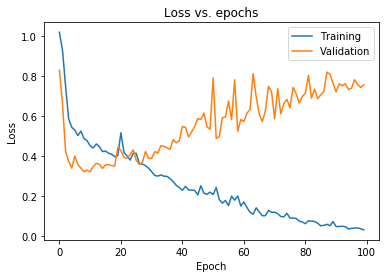

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [14]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu', input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(1)
    ])
    
    return model

In [15]:
# Re-build the model with weight decay and dropout layers
model = get_regularized_model(1e-5, 0.3)

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 1.0366 - mae: 0.8780 - val_loss: 0.8745 - val_mae: 0.7527
Epoch 2/100
337/337 - 0s - loss: 1.0242 - mae: 0.8717 - val_loss: 0.8361 - val_mae: 0.7341
Epoch 3/100
337/337 - 0s - loss: 0.9808 - mae: 0.8510 - val_loss: 0.7319 - val_mae: 0.6823
Epoch 4/100
337/337 - 0s - loss: 0.8834 - mae: 0.7966 - val_loss: 0.5634 - val_mae: 0.5930
Epoch 5/100
337/337 - 0s - loss: 0.7255 - mae: 0.7098 - val_loss: 0.4563 - val_mae: 0.5459
Epoch 6/100
337/337 - 0s - loss: 0.7041 - mae: 0.6936 - val_loss: 0.4121 - val_mae: 0.5183
Epoch 7/100
337/337 - 0s - loss: 0.6258 - mae: 0.6561 - val_loss: 0.3788 - val_mae: 0.4973
Epoch 8/100
337/337 - 0s - loss: 0.6128 - mae: 0.6456 - val_loss: 0.3524 - val_mae: 0.4810
Epoch 9/100
337/337 - 0s - loss: 0.5707 - mae: 0.6080 - val_loss: 0.3319 - val_mae: 0.4621
Epoch 10/100
337/337 - 0s - loss: 0.5924 - mae: 0.6212 - val_loss: 0.3269 - val_mae: 0.4559
Epoch 11/100
337/337 - 0s - loss: 0.5790 - m

In [18]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.5289 - mae: 0.6183


[0.5510452654626634, 0.6182886]

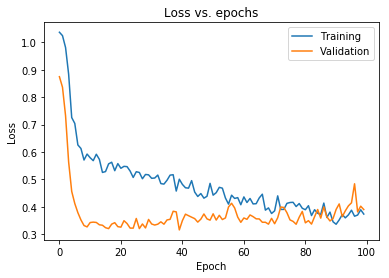

In [19]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [20]:
# Write a Custom Callback

from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    def on_train_begin(self, logs=None):
        print('Starting Training...')
        
    def on_epoch_begin(selg, epoch, logs=None):
        print(f'Starting Epoch {epoch}')
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f'Training: Starting batch {batch}')
        
    def on_train_batch_end(self, batch, logs=None):
        print(f'Training Finished batch {batch}')
        
    def on_epoch_end(self, epoch, logs=None):
        print(f'Finished epoch {epoch}')
        
    def on_train_end(self, logs=None):
        print('Training Finished...')
        
class TestingCallback(Callback):
    def on_test_begin(self, logs=None):
        print("Starting testing...")
        
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing Finished batch {batch}")
        
    def on_test_end(self, logs=None):
        print("Finished testing!")
        
class PredictionCallback(Callback):
    def on_predict_begin(self, logs=None):
        print("Starting prediction...")
        
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Prediction: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Prediction: Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print("Finished Prediction!")        

In [21]:
# Re-build the model

model = get_regularized_model(1e-5, 0.3)

In [22]:
# Compile the model

model.compile(optimizer='adam', loss='mae')

#### Train the model with the callback

In [23]:
# Train the model, with some of the data reserved for validation

model.fit(train_data, train_targets, epochs=3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting Training...
Starting Epoch 0
Training: Starting batch 0
Training Finished batch 0
Training: Starting batch 1
Training Finished batch 1
Training: Starting batch 2
Training Finished batch 2
Training: Starting batch 3
Training Finished batch 3
Finished epoch 0
Starting Epoch 1
Training: Starting batch 0
Training Finished batch 0
Training: Starting batch 1
Training Finished batch 1
Training: Starting batch 2
Training Finished batch 2
Training: Starting batch 3
Training Finished batch 3
Finished epoch 1
Starting Epoch 2
Training: Starting batch 0
Training Finished batch 0
Training: Starting batch 1
Training Finished batch 1
Training: Starting batch 2
Training Finished batch 2
Training: Starting batch 3
Training Finished batch 3
Finished epoch 2
Training Finished...


In [24]:
# Evaluate the model

model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Starting testing...
Testing Starting batch 0
Testing Finished batch 0
Testing Starting batch 1
Testing Finished batch 1
Finished testing!


0.7696803106202019

In [25]:
# Make predictions with the model

model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction...
Prediction: Starting batch 0
Prediction: Finished batch 0
Prediction: Starting batch 1
Prediction: Finished batch 1
Finished Prediction!


array([[-0.06450725],
       [-0.05123276],
       [-0.09562369],
       [-0.15718457],
       [-0.17136441],
       [-0.05783238],
       [-0.15341642],
       [-0.14267875],
       [-0.15918076],
       [-0.05679109],
       [-0.16929485],
       [-0.14309056],
       [-0.08453707],
       [-0.16909805],
       [-0.05564526],
       [-0.07753359],
       [-0.04062675],
       [-0.10111498],
       [-0.11156189],
       [-0.1350661 ],
       [-0.12283809],
       [-0.08187717],
       [-0.14138061],
       [-0.0783622 ],
       [-0.13554975],
       [-0.10359172],
       [-0.09950209],
       [-0.1297769 ],
       [-0.06711304],
       [-0.07110291],
       [-0.11219151],
       [-0.07510324],
       [-0.05826429],
       [-0.1406178 ],
       [-0.12921903],
       [-0.06242756],
       [-0.05403563],
       [-0.0947939 ],
       [-0.09649223],
       [-0.18249325],
       [-0.01737206],
       [-0.12156259],
       [-0.09853869],
       [-0.0355663 ],
       [-0.15055642]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [37]:
# Re-train the unregularised model

unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unreg_history = unregularised_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

In [38]:
# Evaluate the model on the test set

unregularised_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.4950


0.5309185220135583

In [39]:
# Re-train the regularised model

# Re-train the unregularised model

regularised_model = get_regularized_model(1e-8, 0.2)
regularised_model.compile(optimizer='adam', loss='mse')
reg_history = regularised_model.fit(train_data, train_targets, epochs=100, validation_split=0.15, batch_size=64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

In [40]:
# Evaluate the model on the test set

regularised_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.4020


0.493526726298862

#### Plot the learning curves

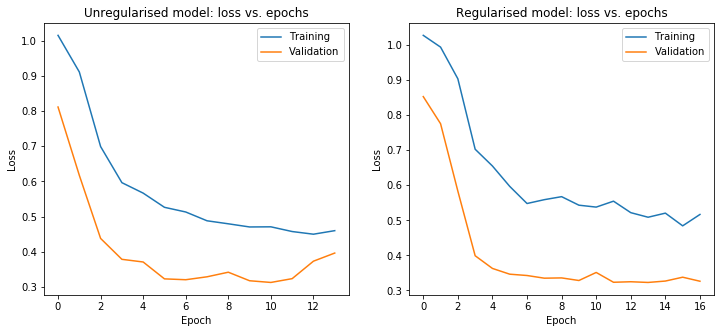

In [41]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()